### Introduction
Event data is often created as users navigate from screen to screen while using websites and other software. Engineering features for this type of data can be tricky.  There can be lots of data and it may first seem unpredictable and hard to wrangle.  Kaggle’s 2019 Data Science Bowl offers a wonderful opportunity to practice wrangling this type of data. The goal of the competition is to determine how different media types can improve performance on in-game assessments.  

### Notebook Summary
This notebook shows some exploratory data analysis aimed at understanding a "typical" user: which media types (Game, Clip, Activity, or Assessment) are visited the most per user, the number of sessions per user, and the session length.  The event data is visualized using a scatterplot with different color dots for each media type.  One goal is to start uncovering features to engineer.  

### Related Blog Post
https://h-fuzzy-logic.github.io/blog/intuition-user-events/

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [5]:
def GetAllSessionsFromTrain():
    df_sessions = pd.read_csv('data/train.csv');
    return df_sessions;

df_session = GetAllSessionsFromTrain()


In [6]:
df_session.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""duration"":6919,""event_count"":3,""game_time"":6972,""event_code"":3110}",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [7]:
random_users = df_session[df_session.installation_id.isin(['0001e90f', 'fffc0583', '6e770448', '6222b811'])]
random_users.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""duration"":6919,""event_count"":3,""game_time"":6972,""event_code"":3110}",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [8]:
# To make visualizing the data easier: 
    # Get minimum timestamp for each session.  Will be used later to calculate the number of minutes 
        # into the session when the event happened 
    # Also determine a sequential session index for each unique session.  
    
grouped_sessions = random_users.groupby(['installation_id', 'game_session'], sort=False).agg({ 
    'timestamp':'min'
})

grouped_sessions['session_index'] = grouped_sessions.groupby(level=0, as_index=False).cumcount()+1
grouped_sessions = grouped_sessions.reset_index()

grouped_sessions.head(20)

,installation_id,game_session,timestamp,session_index
0,0001e90f,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,1
1,0001e90f,17eeb7f223665f53,2019-09-06T17:54:17.519Z,2
2,0001e90f,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,3
3,0001e90f,a1ec58f109218255,2019-09-06T17:58:28.042Z,4
4,0001e90f,f11eb823348bfa23,2019-09-06T18:00:51.915Z,5
5,0001e90f,091587ed87b9637c,2019-09-06T18:10:51.183Z,6
6,0001e90f,07bacda7f9437b38,2019-09-06T18:11:28.381Z,7
7,0001e90f,ca8b415f34d12873,2019-09-06T18:16:25.132Z,8
8,0001e90f,3fce4f09769ff0b7,2019-09-06T18:18:11.250Z,9
9,0001e90f,04168b61c0650977,2019-09-06T18:18:42.392Z,10


In [9]:
# Grab columns of interest

random_users_narrow = random_users[['installation_id', 'game_session', 'timestamp', 'type']]
random_users_narrow.head(20)

,installation_id,game_session,timestamp,type
0,0001e90f,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,Clip
1,0001e90f,17eeb7f223665f53,2019-09-06T17:54:17.519Z,Clip
2,0001e90f,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,Activity
3,0001e90f,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,Activity
4,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,Activity
5,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,Activity
6,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,Activity
7,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:07.546Z,Activity
8,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:07.979Z,Activity
9,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:08.566Z,Activity


In [10]:
# Combine grouped dataframe with random users data frame

summary_users = pd.merge(random_users_narrow, grouped_sessions, how='inner', 
                     left_on=['installation_id', 'game_session'], right_on =['installation_id', 'game_session'])
summary_users.rename(columns={'timestamp_x':'timestamp_event', 'timestamp_y':'timestamp_session_min'}, inplace=True)
summary_users['session_time'] = ( pd.to_datetime(summary_users['timestamp_event']) - pd.to_datetime(summary_users['timestamp_session_min']) ).dt.total_seconds() / 60
summary_users.head(10)

,installation_id,game_session,timestamp_event,type,timestamp_session_min,session_index,session_time
0,0001e90f,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,Clip,2019-09-06T17:53:46.937Z,1,0.000000
1,0001e90f,17eeb7f223665f53,2019-09-06T17:54:17.519Z,Clip,2019-09-06T17:54:17.519Z,2,0.000000
2,0001e90f,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,Activity,2019-09-06T17:54:56.302Z,3,0.000000
3,0001e90f,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,Activity,2019-09-06T17:54:56.302Z,3,0.001417
4,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,Activity,2019-09-06T17:54:56.302Z,3,0.115850
5,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,Activity,2019-09-06T17:54:56.302Z,3,0.166283
6,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,Activity,2019-09-06T17:54:56.302Z,3,0.176850
7,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:07.546Z,Activity,2019-09-06T17:54:56.302Z,3,0.187400
8,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:07.979Z,Activity,2019-09-06T17:54:56.302Z,3,0.194617
9,0001e90f,0848ef14a8dc6892,2019-09-06T17:55:08.566Z,Activity,2019-09-06T17:54:56.302Z,3,0.204400


In [11]:
# Verify the number of events in the random_users dataframe matches the number of 
# events after merging with the grouped dataframe (to make sure no events were lost)

print(random_users.shape)
print(summary_users.shape)

(2585, 11)
(2585, 7)


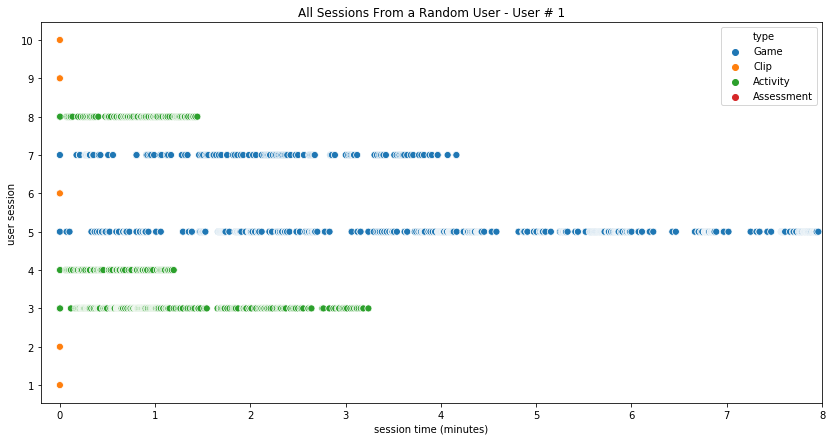

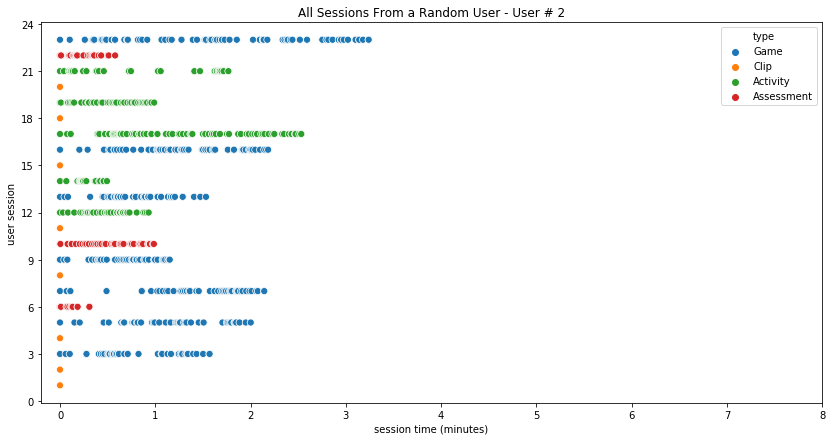

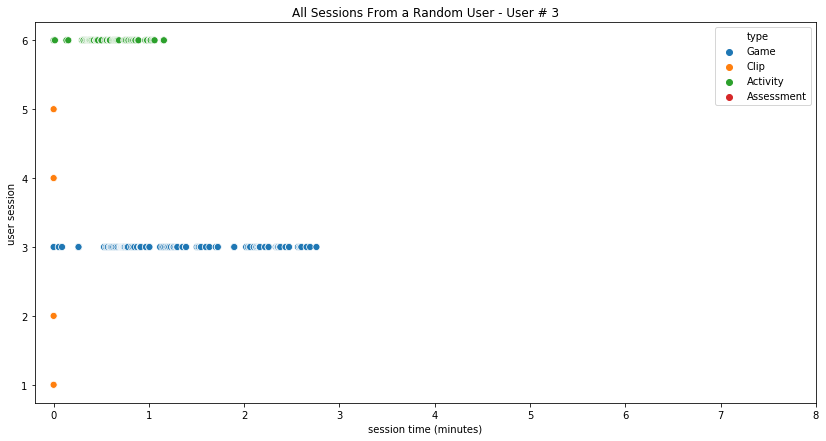

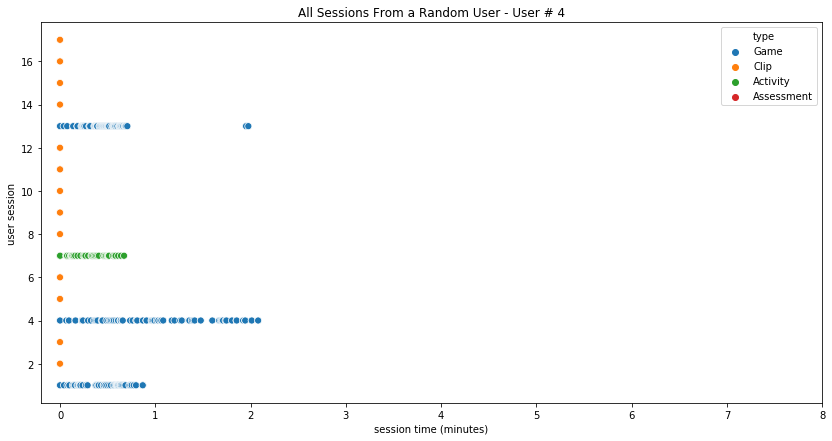

In [12]:
# Plot events by session for each user. Use colors to denote each media type. 

grouped = summary_users.groupby(['installation_id'])
i=1

for name, group in grouped:
    plt.figure(figsize = (14,7))
    ax = sns.scatterplot(x="session_time", y="session_index", data=group, s=50, marker='o', hue_order=["Game", "Clip", "Activity", "Assessment"], hue="type")
    ax.set(xlim=(-0.2, 8))
    ax.set( xlabel="session time (minutes)", ylabel="user session", title="All Sessions From a Random User - User # " + str(i))  
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()
    i = i+1

### Narratives about the users (trying to understand a "typical" user)

* User 2 played 23 sessions, none lasting longer than 4 minutes. User 2 experienced all four media types (Game, Clip, Activity, and Assessment) and attempted an Assessment 3 times.

* User 4 played 17 sessions, none lasting longer than 3 minutes.  User 3 did not take any Assessments, but experienced the other three media types.  

### Possible Next Steps for EDA
* Compare Assessment outcomes (scores) with session analysis (above)
* Explore timestamps (time of day) with Assessment outcomes
* Explore time gaps between viewing non-Assessment media types and Assessment outcomes